In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
cityride_df = city_df.merge(ride_df, on="city")

# Display the data table for previe
cityride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [74]:
import matplotlib.lines as plt_line

## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph propertie
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

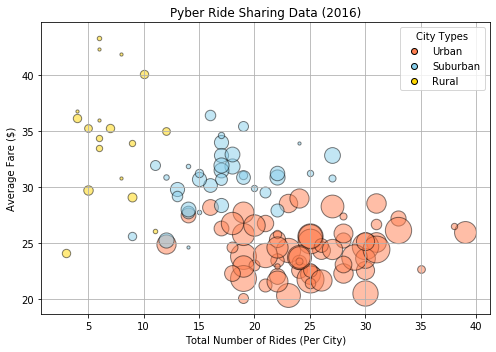

In [152]:
# Data Set Up for plotting

plotting_df = city_df.copy()

# Average Fare Set Up
cityride_gb = cityride_df.groupby('city')
plotting_df = plotting_df.merge(cityride_gb.mean()['fare'], on='city')

# Num Rides Set Up
rides_size = cityride_gb.size().rename("num_rides")
plotting_df = plotting_df.merge(rides_size, on='city')


# Plotting

plt.figure(figsize=(7,5))
color_dict = {'Urban':'Coral', 'Suburban':'SkyBlue', 'Rural':'Gold'}
markers = [plt_line.Line2D([],[],marker='o', markeredgecolor='k', markerfacecolor='Coral', linestyle=''), # Urban
           plt_line.Line2D([],[],marker='o', markeredgecolor='k', markerfacecolor='SkyBlue', linestyle=''), # Suburban
           plt_line.Line2D([],[],marker='o', markeredgecolor='k', markerfacecolor='Gold', linestyle='')] # Rural

for row in plotting_df.iterrows():
    row = row[1]
    plt.scatter(x=row[4], y=row[3], s=row[1]*10, color=color_dict[str(row[2])], alpha=.5, edgecolor='k')



plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.grid()
plt.tight_layout()
plt.legend(markers,('Urban', 'Suburban', 'Rural'), title="City Types")

plt.savefig("Pyber_bubbleplot.png")
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents
# Build Pie Chart
# Save Figure

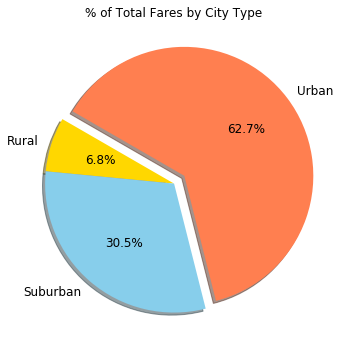

In [154]:
# Data Set up for City Type Pie Chart
# We want total to plot percentages of total FARE by TYPE

cityride_gb = cityride_df.groupby("type") # Groupby by Type: Urban, Suburban, and Rural
plotting_df = cityride_gb.sum()['fare'] # Total Sum in groupby

# Set Up for Pie Chart
explode = [0,0,.1]
labels = ['Rural', 'Suburban','Urban']
colors = ['Gold','SkyBlue','Coral']


plt.figure(figsize=(7,5))
patches, txt, autotxt = plt.pie(plotting_df.array, labels=labels, explode=explode, colors=colors,
                       shadow=True, startangle=150, autopct= '%1.1f%%')

for tx in txt:
    tx.set_fontsize('large')
for atx in autotxt:
    atx.set_fontsize('large')

plt.title("% of Total Fares by City Type")
plt.tight_layout()

plt.savefig("Pyber_farespie.png")
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents
# Build Pie Chart
# Save Figure

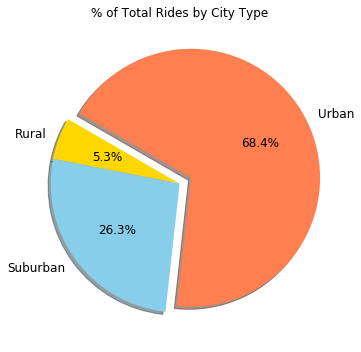

In [156]:
# Use the current groupby but use sum()

plotting_df = cityride_gb.size().rename("total_rides")

plt.figure(figsize=(7,5))
patches, txt, autotxt = plt.pie(plotting_df.array, labels=labels, explode=explode, colors=colors,
                       shadow=True, startangle=150, autopct= '%1.1f%%')

for tx in txt:
    tx.set_fontsize('large')
for atx in autotxt:
    atx.set_fontsize('large')

plt.title("% of Total Rides by City Type")
plt.tight_layout()

plt.savefig("Pyber_ridespie.png")
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents
# Build Pie Charts
# Save Figure

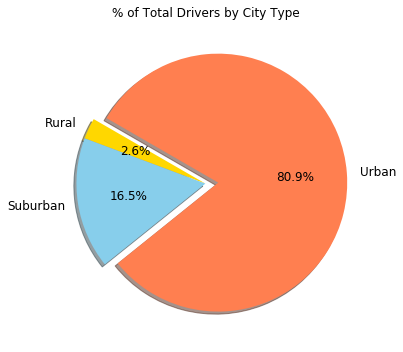

In [157]:
city_gb = city_df.groupby("type")
plotting_df = city_gb.sum()['driver_count'].array

plt.figure(figsize=(7,5))
patches, txt, autotxt = plt.pie(plotting_df, labels=labels, explode=explode, colors=colors,
                       shadow=True, startangle=150, autopct= '%1.1f%%')

for tx in txt:
    tx.set_fontsize('large')
for atx in autotxt:
    atx.set_fontsize('large')

plt.title("% of Total Drivers by City Type")
plt.tight_layout()

plt.savefig("Pyber_driverspie.png")
plt.show()